In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/protein_data.csv')
data.head()

,sequence,classification
0,AQLVDSMPSASTGSVVVTDDLNYWGGRRIKSKDGATTEPVFEPATG...,OXIDOREDUCTASE
1,MGAFLDKPKMEKHNAQGQGNGLRYGLSSMQGWRVEMEDAHTAVIGL...,HYDROLASE
2,STAGKVIKCKAAVLWEEKKPFSIEEVEVAPPKAHEVRIKMVATGIC...,OXIDOREDUCTASE
3,MDIRQGPKEPFRDYVDRFYKTLRAEQASQEVKNWMTETLLVQNANP...,VIRAL PROTEIN
4,EVKQENRLLNESESSSQGLLGYYFSDLNFQAPMVVTSSTTGDLSIP...,TOXIN


In [3]:
X = data['sequence']
y = data['classification']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
class_names = le.classes_
n_classes = len(class_names)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [4]:
n_classes

32

In [5]:
class_names

array(['CELL ADHESION', 'CELL CYCLE', 'CHAPERONE', 'DE NOVO PROTEIN',
       'DNA BINDING PROTEIN', 'ELECTRON TRANSPORT', 'GENE REGULATION',
       'HYDROLASE', 'HYDROLASE/HYDROLASE INHIBITOR', 'IMMUNE SYSTEM',
       'ISOMERASE', 'LIGASE', 'LYASE', 'MEMBRANE PROTEIN',
       'METAL BINDING PROTEIN', 'OXIDOREDUCTASE',
       'OXIDOREDUCTASE/OXIDOREDUCTASE INHIBITOR', 'PHOTOSYNTHESIS',
       'PROTEIN BINDING', 'PROTEIN TRANSPORT', 'RNA BINDING PROTEIN',
       'SIGNALING PROTEIN', 'STRUCTURAL GENOMICS, UNKNOWN FUNCTION',
       'STRUCTURAL PROTEIN', 'SUGAR BINDING PROTEIN', 'TOXIN',
       'TRANSCRIPTION', 'TRANSFERASE',
       'TRANSFERASE/TRANSFERASE INHIBITOR', 'TRANSPORT PROTEIN',
       'UNKNOWN FUNCTION', 'VIRAL PROTEIN'], dtype=object)

In [6]:
avg_char_len = X_train.str.len().mean()
print(f"Average character length: {avg_char_len:.2f}")

Average character length: 241.89


In [7]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

max_vocab_length = 25
max_length = 300

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    split="character",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [8]:
text_vectorizer.adapt(X_train)

In [9]:
import random

random_seq = random.choice(X_train)
print(f"Original text:\n{random_seq}\
      \n\nVectorized version:")
text_vectorizer([random_seq])

Original text:
MAHHHHHHMGTLEAQTQGPGSMSFSNVPAGKDLPQDFNVIIEIPAQSEPVKYEADKALGLLVVDRFIGTGMRYPVNYGFIPQTLSGDGDPVDVLVITPFPLLAGSVVRARALGMLKMTDESGVDAKLVAVPHDKVCPMTANLKSIDDVPAYLKDQIKHFFEQYKALEKGKWVKVEGWDGIDAAHKEITDGVANFKK      

Vectorized version:


<tf.Tensor: shape=(1, 300), dtype=int64, numpy=
array([[19,  3, 18, 18, 18, 18, 18, 18, 19,  4, 11,  2,  6,  3, 16, 11,
        16,  4, 13,  4,  7, 19,  7, 15,  7, 14,  5, 13,  3,  4,  8,  9,
         2, 13, 16,  9, 15, 14,  5, 10, 10,  6, 10, 13,  3, 16,  7,  6,
        13,  5,  8, 17,  6,  3,  9,  8,  3,  2,  4,  2,  2,  5,  5,  9,
        12, 15, 10,  4, 11,  4, 19, 12, 17, 13,  5, 14, 17,  4, 15, 10,
        13, 16, 11,  2,  7,  4,  9,  4,  9, 13,  5,  9,  5,  2,  5, 10,
        11, 13, 15, 13,  2,  2,  3,  4,  7,  5,  5, 12,  3, 12,  3,  2,
         4, 19,  2,  8, 19, 11,  9,  6,  7,  4,  5,  9,  3,  8,  2,  5,
         3,  5, 13, 18,  9,  8,  5, 21, 13, 19, 11,  3, 14,  2,  8,  7,
        10,  9,  9,  5, 13,  3, 17,  2,  8,  9, 16, 10,  8, 18, 15, 15,
         6, 16, 17,  8,  3,  2,  6,  8,  4,  8, 20,  5,  8,  5,  6,  4,
        20,  9,  4, 10,  9,  3,  3, 18,  8,  6, 10, 11,  9,  4,  5,  3,
        14, 15,  8,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0, 

In [10]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 25
Top 5 most common words: ['', '[UNK]', 'l', 'a', 'g']
Bottom 5 least common words: ['w', 'c', 'x', 'b', 'z']


In [11]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1") 

embedding

In [12]:
# Get a random sentence from training set
random_seq = random.choice(X_train)
print(f"Original text:\n{random_seq}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_seq]))
sample_embed

Original text:
GSSEHLKREHSLIKPYQGVGSSSMPLWDFQGSTILTSQYVRLTPDERSKEGSIWNHQPCFLKDWEMHVHFKVHGTGKKNLHGDGIALWYTRDRLVPGPVFGSKDNFHGLAIFLDTYPNDETTERVFPYISVMVNNGSLSYDHSKDGRWTELAGCTADFRNRDHDTFLAVRYSRGRLTVMTDLEDKNEWKNCIDITGVRLPTGYYFGASAGTGDLSDNHDIISMKLFQLMVEHTPDEENIDWTKIEPSVNFLKS      

Embedded version:


<tf.Tensor: shape=(1, 300, 128), dtype=float32, numpy=
array([[[ 0.04371962,  0.04255669, -0.02453597, ...,  0.03685858,
         -0.02092716,  0.01008142],
        [-0.00025875,  0.04902965,  0.00357349, ...,  0.03631172,
          0.01563982,  0.02050025],
        [-0.00025875,  0.04902965,  0.00357349, ...,  0.03631172,
          0.01563982,  0.02050025],
        ...,
        [ 0.02202084, -0.04383255,  0.01650442, ..., -0.03762051,
          0.01578439,  0.01182286],
        [ 0.02202084, -0.04383255,  0.01650442, ..., -0.03762051,
          0.01578439,  0.01182286],
        [ 0.02202084, -0.04383255,  0.01650442, ..., -0.03762051,
          0.01578439,  0.01182286]]], dtype=float32)>

In [13]:
y_test

array([ 6, 23, 31, ...,  6, 12, 16])

In [14]:
y_test_str = [class_names[y] for y in y_test]

In [15]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(128))(x)

x = layers.Dense(256, activation="relu")(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)

outputs = layers.Dense(n_classes, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 300)              0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 300, 128)          3200      
                                                                 
 bidirectional (Bidirectiona  (None, 300, 256)         263168    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                             

In [17]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/20
6096/6096 [==============================] - 1111s 100ms/step - loss: 2.8222 - accuracy: 0.2141 - val_loss: 2.1838 - val_accuracy: 0.3750
Epoch 2/20
6096/6096 [==============================] - 613s 101ms/step - loss: 1.5906 - accuracy: 0.5461 - val_loss: 1.1867 - val_accuracy: 0.6589
Epoch 3/20
6096/6096 [==============================] - 603s 99ms/step - loss: 0.9331 - accuracy: 0.7284 - val_loss: 0.8286 - val_accuracy: 0.7589
Epoch 4/20
6096/6096 [==============================] - 616s 101ms/step - loss: 0.6853 - accuracy: 0.7982 - val_loss: 0.6845 - val_accuracy: 0.7990
Epoch 5/20
6096/6096 [==============================] - 619s 101ms/step - loss: 0.5623 - accuracy: 0.8323 - val_loss: 0.5731 - val_accuracy: 0.8352
Epoch 6/20
6096/6096 [==============================] - 622s 102ms/step - loss: 0.4924 - accuracy: 0.8507 - val_loss: 0.5349 - val_accuracy: 0.8430
Epoch 7/20
6096/6096 [==============================] - 615s 101ms/step - loss: 0.4464 - accuracy: 0.8639 - val_

In [18]:
model.evaluate(X_test, y_test)

1694/1694 [==============================] - 76s 45ms/step - loss: 0.3879 - accuracy: 0.8880


[0.3879428505897522, 0.8879722356796265]

In [19]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred)
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [20]:
pred_probs = model.predict(X_test)
preds = tf.argmax(pred_probs, axis=1)
results = calculate_results(y_test, preds)
results

1694/1694 [==============================] - 77s 45ms/step


{'accuracy': 0.8879722422161933,
 'precision': 0.8839409687239201,
 'recall': 0.8879722422161933,
 'f1': 0.8845762700757658}

<Axes: >

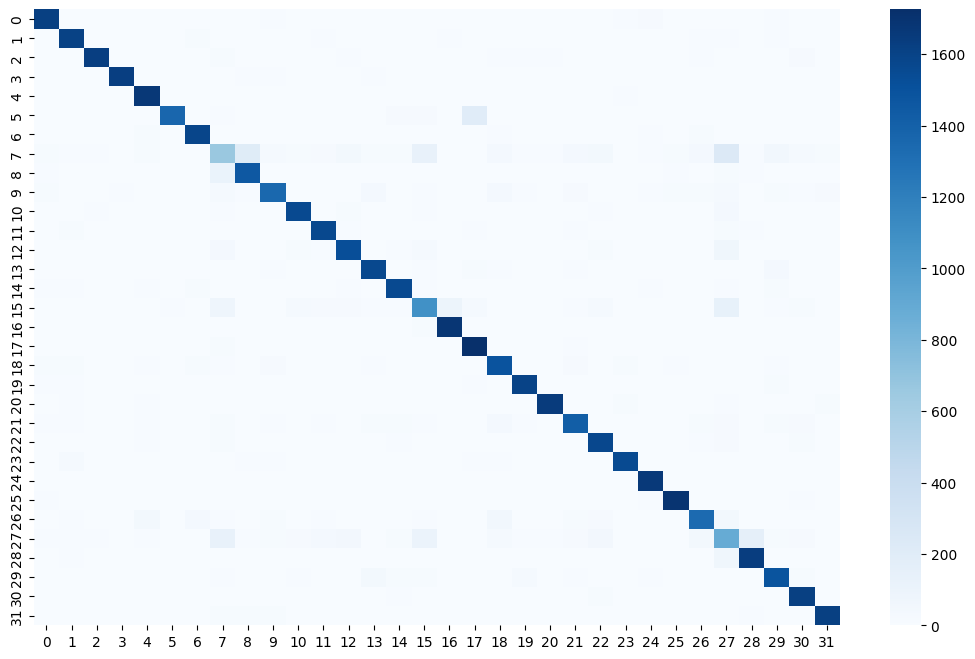

In [22]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, preds)
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat, cmap="Blues")

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds, target_names=class_names))

                                         precision    recall  f1-score   support

                          CELL ADHESION       0.93      0.95      0.94      1708
                             CELL CYCLE       0.91      0.95      0.93      1685
                              CHAPERONE       0.96      0.94      0.95      1729
                        DE NOVO PROTEIN       0.99      0.97      0.98      1682
                    DNA BINDING PROTEIN       0.92      0.98      0.95      1705
                     ELECTRON TRANSPORT       0.98      0.84      0.90      1628
                        GENE REGULATION       0.93      0.96      0.95      1646
                              HYDROLASE       0.56      0.37      0.45      1783
          HYDROLASE/HYDROLASE INHIBITOR       0.84      0.88      0.86      1661
                          IMMUNE SYSTEM       0.89      0.80      0.84      1685
                              ISOMERASE       0.93      0.93      0.93      1683
                           